In [17]:
%matplotlib inline
import numpy as np
import cv2 as cv
import skimage
from skimage.io import imread
from skimage.color import rgb2gray
from scipy import signal as sig
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [20]:
#step 1 greyscale the RGB image
img = cv.imread('phone.jpg')
imggrey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
imggrey = np.float32(imggrey)

In [21]:
#step 2 gradient calculations
def gradient_x(imggrey):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggrey, kernel_x, mode='same')
def gradient_y(imggrey):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggrey, kernel_y, mode='same')

I_x = gradient_x(imggrey)
I_y = gradient_y(imggrey)

In [22]:
#step 3 structured tensor
Ixx = gaussian_filter(I_x**2, sigma=1)
Ixy = gaussian_filter(I_y*I_x, sigma=1)
Iyy = gaussian_filter(I_y**2, sigma=1)

In [23]:
#step 4 corner response function
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [24]:
#step 5 find edges
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

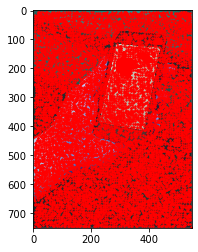

In [25]:
corners = skimage.feature.corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)

In [27]:
#cv2 implementation
dst = cv.cornerHarris(imggrey,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

Not exactly sure where I went wrong in the manual implementatio of the Harris detector but the resultant imagw shows almost all the image being marked as a corner. Compared to the cv2 library function where the result is perfect observation on the corners in the phone and the border image.